1. Regresión Lineal con Regularización (Lasso y Ridge)

In [1]:
#Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Cargar los datos
df = pd.read_csv("../data/processed/EDA_Final.csv")

# Dividir los datos en X e y
X = df.drop("log_price", axis=1)
y = df["log_price"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar las columnas categóricas y numéricas
cat_variables = ['city', 'state']
num_variables = ['bed', 'bath', 'acre_lot', 'log_house_size', 'one_adult_no_kids_living_wage',
                 'one_adult_one_kid_living_wage', 'one_adult_two_kids_living_wage', 
                 'one_adult_three_kids_living_wage', 'two_adults_one_working_no_kids_living_wage', 
                 'two_adults_one_working_one_kid_living_wage', 'two_adults_one_working_two_kids_living_wage', 
                 'two_adults_one_working_three_kids_living_wage', 'two_adults_both_working_no_kids_living_wage', 
                 'two_adults_both_working_one_kid_living_wage', 'two_adults_both_working_two_kids_living_wage', 
                 'two_adults_both_working_three_kids_living_wage', 'crime_index', 'city_n', 'state_n']

# Crear el ColumnTransformer para aplicar OneHotEncoding a las categóricas y MinMaxScaler a las numéricas
column_transformer = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_variables),
    ('num', MinMaxScaler(), num_variables)
], remainder='passthrough')

# Aplicar la transformación a los datos de entrenamiento y prueba
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores hiperparámetros Lasso: {'alpha': 0.01}
R2 Score Test con Lasso optimizado: 0.8555898148242174


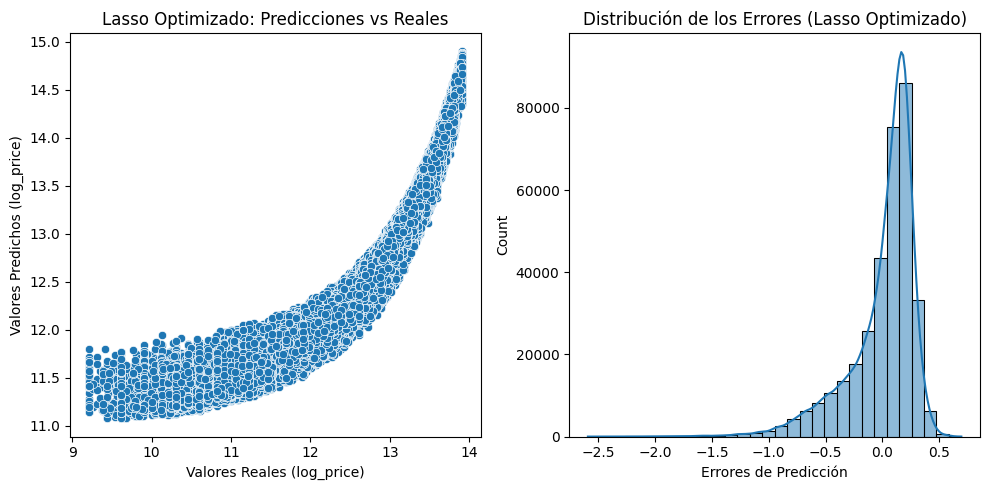

In [2]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el modelo Lasso
lasso_model = Lasso(max_iter=1000, random_state=42)

# Definir el grid de hiperparámetros a buscar
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Configurar GridSearchCV
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, 
                                 cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Ejecutar GridSearchCV
grid_search_lasso.fit(X_train_encoded, y_train)

# Mejor conjunto de hiperparámetros encontrados
best_params_lasso = grid_search_lasso.best_params_
print(f"Mejores hiperparámetros Lasso: {best_params_lasso}")

# Evaluar el mejor modelo
best_lasso_model = grid_search_lasso.best_estimator_
y_pred_test_best_lasso = best_lasso_model.predict(X_test_encoded)
print(f"R2 Score Test con Lasso optimizado: {r2_score(y_test, y_pred_test_best_lasso)}")

# Gráficos
plt.figure(figsize=(10, 5))

# Gráfico de dispersión de predicciones vs valores reales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_best_lasso)
plt.xlabel('Valores Reales (log_price)')
plt.ylabel('Valores Predichos (log_price)')
plt.title('Lasso Optimizado: Predicciones vs Reales')

# Gráfico de distribución de los errores
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_test_best_lasso, kde=True, bins=30)
plt.xlabel('Errores de Predicción')
plt.title('Distribución de los Errores (Lasso Optimizado)')

plt.tight_layout()
plt.show()


Lasso Reducido - Métricas de rendimiento
RMSE Train:  0.3180962263907917
RMSE Test:  0.3184348021028926
R2 Score Train:  0.8376278860606401
R2 Score Test:  0.8374301052361697


Python(68031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


R² Score con Validación Cruzada (Lasso Reducido): 0.837624513010538 ± 0.0001689070658269904


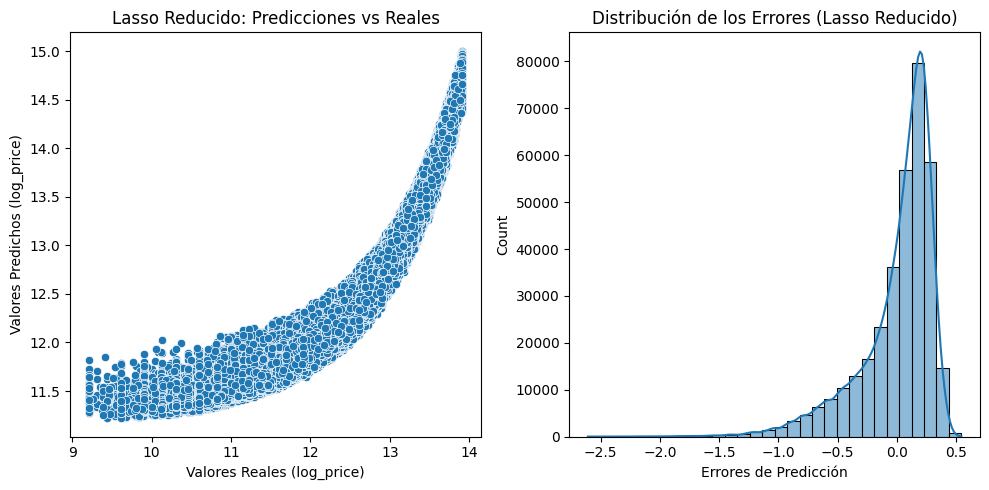


Ridge Reducido - Métricas de rendimiento
RMSE Train:  0.3360025461674536
RMSE Test:  0.33626634816631124
R2 Score Train:  0.8188328102894528
R2 Score Test:  0.8187133234974345


Python(79837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(79838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(79839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(79845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(79847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


R² Score con Validación Cruzada (Ridge Reducido): 0.8188306503723752 ± 0.00029576095792500484


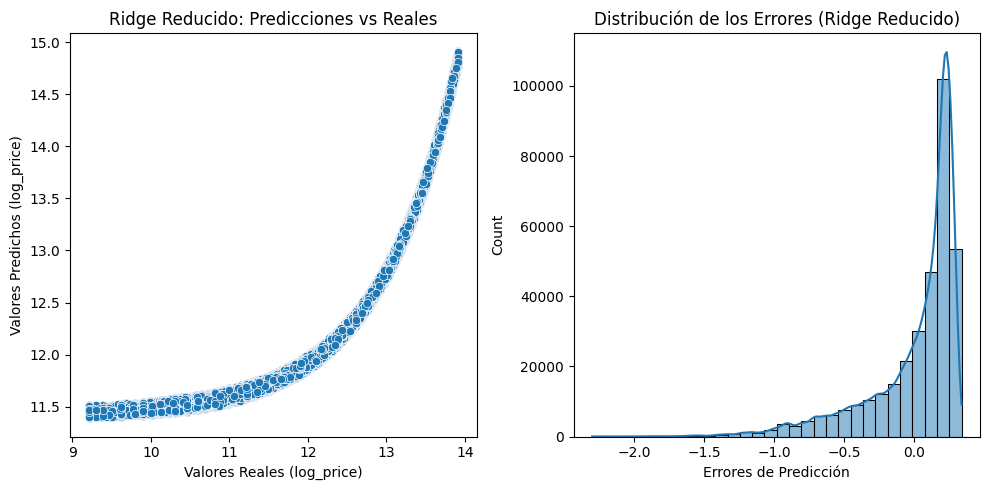

In [4]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de Lasso reducido
lasso_model = Lasso(alpha=0.1, max_iter=1000, random_state=42)

# Entrenar el modelo
lasso_model.fit(X_train_encoded, y_train)

# Hacer predicciones
y_pred_train_lasso = lasso_model.predict(X_train_encoded)
y_pred_test_lasso = lasso_model.predict(X_test_encoded)

# Evaluar el modelo
print("\nLasso Reducido - Métricas de rendimiento")
print("RMSE Train: ", np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))
print("R2 Score Train: ", r2_score(y_train, y_pred_train_lasso))
print("R2 Score Test: ", r2_score(y_test, y_pred_test_lasso))

# Validación Cruzada
cv_scores_lasso = cross_val_score(lasso_model, X_train_encoded, y_train, cv=3, scoring='r2', n_jobs=-1)
print(f"R² Score con Validación Cruzada (Lasso Reducido): {cv_scores_lasso.mean()} ± {cv_scores_lasso.std()}")

# Gráficos
plt.figure(figsize=(10, 5))

# Gráfico de dispersión de predicciones vs valores reales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_lasso)
plt.xlabel('Valores Reales (log_price)')
plt.ylabel('Valores Predichos (log_price)')
plt.title('Lasso Reducido: Predicciones vs Reales')

# Gráfico de distribución de los errores
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_test_lasso, kde=True, bins=30)
plt.xlabel('Errores de Predicción')
plt.title('Distribución de los Errores (Lasso Reducido)')

plt.tight_layout()
plt.show()

# Repite lo mismo para Ridge
ridge_model = Ridge(alpha=0.1, max_iter=1000, random_state=42)

# Entrenar el modelo
ridge_model.fit(X_train_encoded, y_train)

# Hacer predicciones
y_pred_train_ridge = ridge_model.predict(X_train_encoded)
y_pred_test_ridge = ridge_model.predict(X_test_encoded)

# Evaluar el modelo
print("\nRidge Reducido - Métricas de rendimiento")
print("RMSE Train: ", np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)))
print("R2 Score Train: ", r2_score(y_train, y_pred_train_ridge))
print("R2 Score Test: ", r2_score(y_test, y_pred_test_ridge))

# Validación Cruzada
cv_scores_ridge = cross_val_score(ridge_model, X_train_encoded, y_train, cv=3, scoring='r2', n_jobs=-1)
print(f"R² Score con Validación Cruzada (Ridge Reducido): {cv_scores_ridge.mean()} ± {cv_scores_ridge.std()}")

# Gráficos para Ridge
plt.figure(figsize=(10, 5))

# Gráfico de dispersión de predicciones vs valores reales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_ridge)
plt.xlabel('Valores Reales (log_price)')
plt.ylabel('Valores Predichos (log_price)')
plt.title('Ridge Reducido: Predicciones vs Reales')

# Gráfico de distribución de los errores
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_test_ridge, kde=True, bins=30)
plt.xlabel('Errores de Predicción')
plt.title('Distribución de los Errores (Ridge Reducido)')

plt.tight_layout()
plt.show()


Random Forest Reducido - Métricas de rendimiento
RMSE Train:  0.0004928347231931014
RMSE Test:  0.0004914278174191307
R2 Score Train:  0.9999996102402317
R2 Score Test:  0.9999996128149815


Python(83707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(83708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(83709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(83710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(83711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(83712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(83713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(83714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


R² Score con Validación Cruzada (Random Forest Reducido): 0.9999996427108893 ± 2.3900505279278877e-08


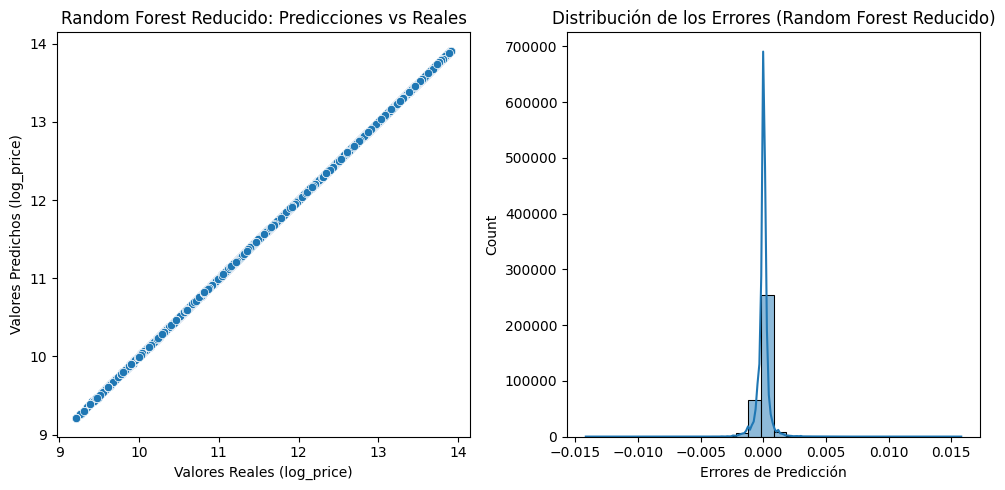

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el modelo de Random Forest reducido
rf_model = RandomForestRegressor(
    n_estimators=50,  # Reducir el número de árboles
    max_depth=10,  # Limitar la profundidad máxima
    min_samples_split=5,  # Aumentar el número de muestras requeridas para hacer una partición
    min_samples_leaf=4,  # Aumentar el número mínimo de muestras en las hojas
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42
)

# Entrenar el modelo
rf_model.fit(X_train_encoded, y_train)

# Hacer predicciones
y_pred_train_rf = rf_model.predict(X_train_encoded)
y_pred_test_rf = rf_model.predict(X_test_encoded)

# Evaluar el modelo
print("\nRandom Forest Reducido - Métricas de rendimiento")
print("RMSE Train: ", np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))
print("R2 Score Train: ", r2_score(y_train, y_pred_train_rf))
print("R2 Score Test: ", r2_score(y_test, y_pred_test_rf))

# Validación Cruzada
cv_scores_rf = cross_val_score(rf_model, X_train_encoded, y_train, cv=3, scoring='r2', n_jobs=-1)
print(f"R² Score con Validación Cruzada (Random Forest Reducido): {cv_scores_rf.mean()} ± {cv_scores_rf.std()}")

# Gráficos
plt.figure(figsize=(10, 5))

# Gráfico de dispersión de predicciones vs valores reales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_rf)
plt.xlabel('Valores Reales (log_price)')
plt.ylabel('Valores Predichos (log_price)')
plt.title('Random Forest Reducido: Predicciones vs Reales')

# Gráfico de distribución de los errores
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_test_rf, kde=True, bins=30)
plt.xlabel('Errores de Predicción')
plt.title('Distribución de los Errores (Random Forest Reducido)')

plt.tight_layout()
plt.show()


XGBoost Reducido - Métricas de rendimiento
RMSE Train:  0.03633074849475986
RMSE Test:  0.03655141741012043
R2 Score Train:  0.9978819163806892
R2 Score Test:  0.9978580589305939
R² Score con Validación Cruzada (XGBoost Reducido): 0.997822843524722 ± 2.591800046013852e-05


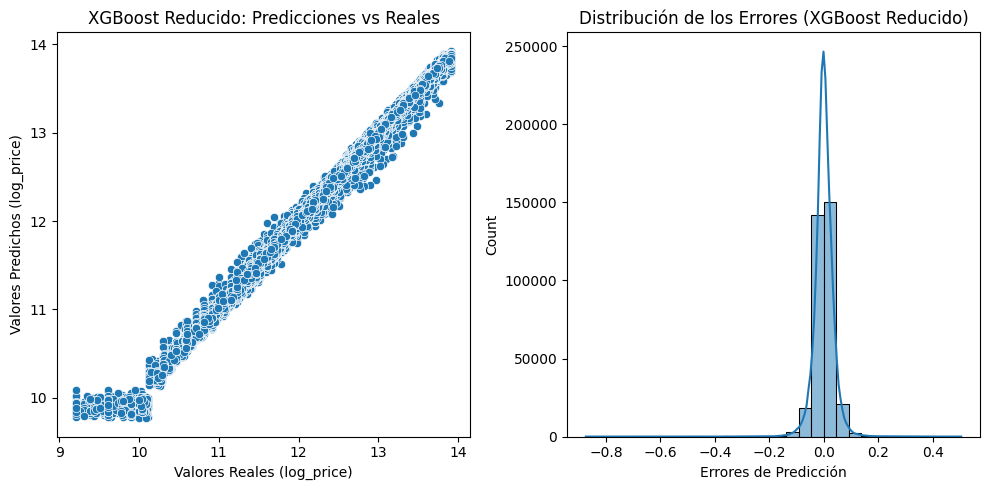

In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumiendo que X_train_encoded y y_train ya están preparados
# Puedes ajustar los datos si no lo están

# Definir el modelo XGBoost con parámetros simplificados
xgb_model_reduced = XGBRegressor(
    n_estimators=50,  # Reducido de 200
    learning_rate=0.1,  # Manteniendo un learning rate moderado
    max_depth=5,  # Reducido para disminuir la complejidad
    subsample=0.8,  # Manteniendo un nivel saludable de muestras
    colsample_bytree=0.8,  # Manteniendo la selección de características
    random_state=42
)

# Entrenar el modelo de XGBoost reducido
xgb_model_reduced.fit(X_train_encoded, y_train)

# Hacer predicciones
y_pred_train_xgb_reduced = xgb_model_reduced.predict(X_train_encoded)
y_pred_test_xgb_reduced = xgb_model_reduced.predict(X_test_encoded)

# Evaluar el modelo
print("\nXGBoost Reducido - Métricas de rendimiento")
print("RMSE Train: ", np.sqrt(mean_squared_error(y_train, y_pred_train_xgb_reduced)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb_reduced)))
print("R2 Score Train: ", r2_score(y_train, y_pred_train_xgb_reduced))
print("R2 Score Test: ", r2_score(y_test, y_pred_test_xgb_reduced))

# Validación Cruzada
cv_scores_xgb_reduced = cross_val_score(xgb_model_reduced, X_train_encoded, y_train, cv=5, scoring='r2')
print(f"R² Score con Validación Cruzada (XGBoost Reducido): {cv_scores_xgb_reduced.mean()} ± {cv_scores_xgb_reduced.std()}")

# Gráficos
plt.figure(figsize=(10, 5))

# Gráfico de dispersión de predicciones vs valores reales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_xgb_reduced)
plt.xlabel('Valores Reales (log_price)')
plt.ylabel('Valores Predichos (log_price)')
plt.title('XGBoost Reducido: Predicciones vs Reales')

# Gráfico de distribución de los errores
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_test_xgb_reduced, kde=True, bins=30)
plt.xlabel('Errores de Predicción')
plt.title('Distribución de los Errores (XGBoost Reducido)')

plt.tight_layout()
plt.show()